###### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:\Kaggle Datasets\Mall Segmentation Data/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Exploratory Data Analysis

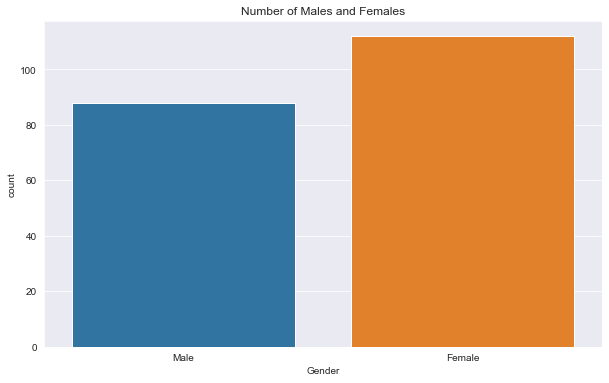

In [8]:
plt.figure(figsize=(10,6))
plt.title("Number of Males and Females")
sns.set_style("darkgrid")
plt.ylabel("Frequency")
sns.countplot(df['Gender'])
plt.show()

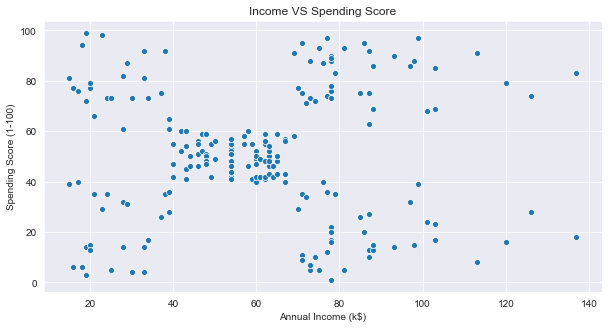

In [9]:
plt.figure(figsize=(10,5))
plt.title("Income VS Spending Score")
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

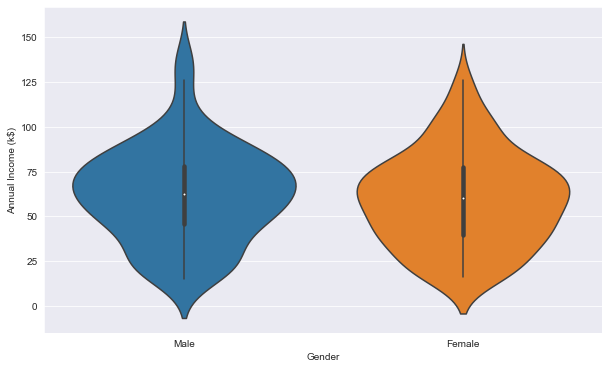

In [20]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Gender',y='Annual Income (k$)',data=df)
plt.show()

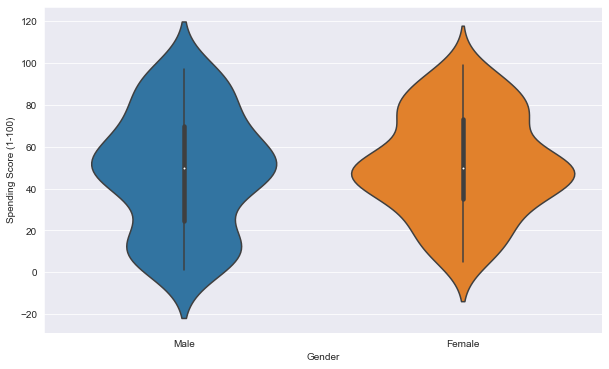

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Gender',y='Spending Score (1-100)',data=df)
plt.show()

##### Modelling

###### 1> On Age And Credit-Score

In [27]:
X = df[['Age',"Spending Score (1-100)"]]

In [24]:
from sklearn.cluster import KMeans

In [36]:
inertia = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertia.append(model.inertia_)

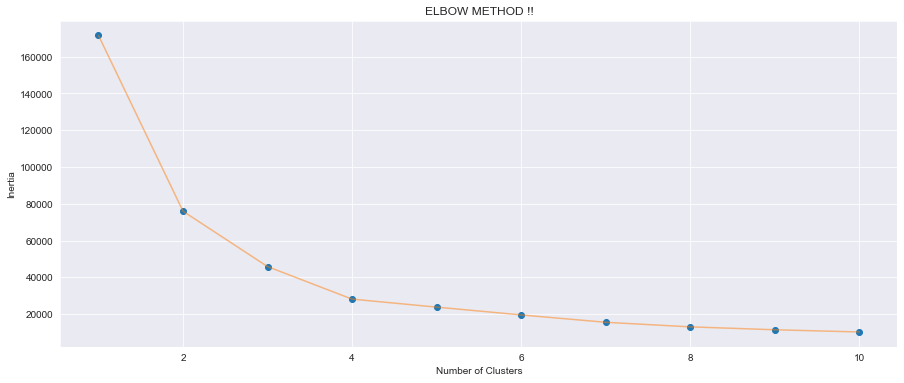

In [38]:
plt.figure(1 , figsize = (15 ,6))
plt.title("ELBOW METHOD !!")
plt.plot(np.arange(1 ,11 ) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [40]:
del model

In [41]:
model = KMeans(n_clusters=4)

In [42]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
labels = model.labels_

In [76]:
labels

array([0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 3, 1, 0, 1,
       3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 0,
       3, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

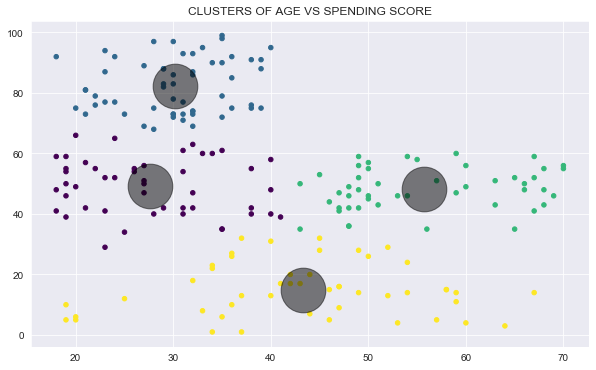

In [80]:
y_kmeans = model.predict(X)
centers = model.cluster_centers_

plt.figure(figsize=(10,6))
plt.title("CLUSTERS OF AGE VS SPENDING SCORE")
plt.scatter(X.iloc[:,0], X.iloc[:,1], cmap='viridis',s=20,c=y_kmeans)
plt.scatter(centers[:, 0], centers[:, 1], s=2000, alpha=0.5,c='black')
plt.show()

###### 2> On ALLUAL INCOME AND SPENDING SCORE

In [79]:
X1 = df[['Annual Income (k$)','Spending Score (1-100)']]

In [82]:
inertia = []
for i in range(1,11):
    model2 = KMeans(n_clusters=i)
    model2.fit(X1)
    inertia.append(model2.inertia_)

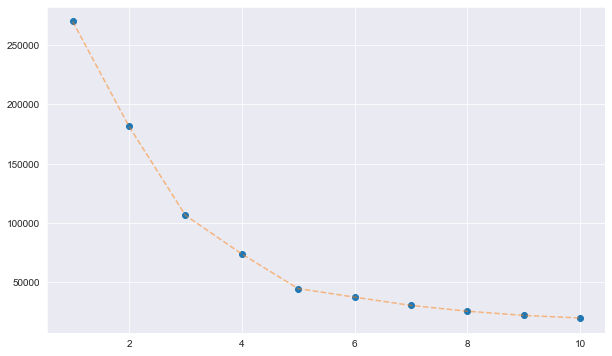

In [90]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'--',alpha=0.5)

In [91]:
del model2

In [92]:
model2 = KMeans(n_clusters=6)
model2.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [96]:
labels = model2.labels_

In [98]:
y_kmeans = model2.predict(X1)

In [105]:
center2 = model2.cluster_centers_

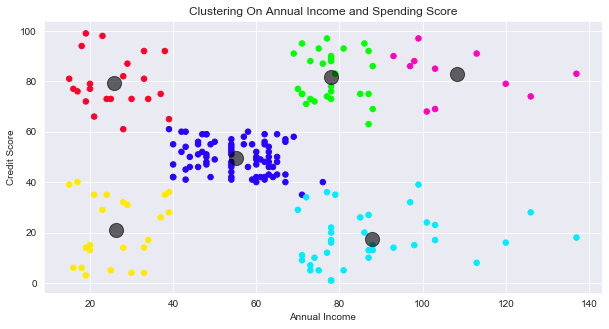

In [117]:
plt.figure(figsize=(10,5))
plt.title("Clustering On Annual Income and Spending Score")

plt.xlabel("Annual Income")
plt.ylabel("Credit Score")
plt.scatter(X1.iloc[:,0],X1.iloc[:,1],c=y_kmeans,cmap='gist_rainbow',s=30)
plt.scatter(center2[:,0],center2[:,1],c='black',alpha=0.6,s=200)
plt.show()